# Crop Visium HD Image

This notebook demonstrates how to crop the Visium HD microscope image to the tissue region using the `prepare_dataframe_image` function.

## Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import sys

# Force reload the module to get the latest changes
import importlib
import crop_visium_hd_image
importlib.reload(crop_visium_hd_image)

# Import the cropping function
from crop_visium_hd_image import prepare_dataframe_image, visualize_crop_boundaries

## Set File Paths

Define paths to the tissue positions parquet file and the microscope image.

In [2]:
# Path to tissue positions data (contains spot coordinates)
df_path = 'small_intenstine/output/binned_outputs/square_002um/spatial/tissue_positions.parquet'

# Path to the full-resolution microscope image
# Update this to point to your actual image file
img_path = 'small_intenstine/input/Visium_HD_Mouse_Small_Intestine_tissue_image.btf'

# Output path for the cropped image
output_path = 'cropped_visium_hd_small_intenstine.png'

## Crop the Image

Process the image and crop it to the Visium HD tissue region.

In [3]:
# Process and crop the image
result = prepare_dataframe_image(
    df_path=df_path,
    img_path=img_path,
    image_format='HE',  # HE stained image (use 'DAPI' for fluorescence)
    row_number=3350,    # Default for Visium HD
    col_number=3350,    # Default for Visium HD
    save_cropped_path=output_path
)

Original image shape: (21943, 23618, 3)
Total number of spots: 11222500
Average spot size: 3.67 x 3.68 pixels
Spots in tissue: 5479660
Spot array range: rows [60, 3345), cols [131, 3322)
Cropping boundaries: rows [0, 21943), cols [90, 23556)
Cropped image shape: (21943, 23466, 3)
Cropped image saved to: cropped_visium_hd_small_intenstine.png
Mapping pixels to spots...
Pixel mapping complete!


## Explore the Results

In [4]:
# Print basic information
print(f"Original image shape: {result['image_array'].shape}")
print(f"Cropped image shape: {result['cropped_image'].shape}")
print(f"Total spots: {len(result['df'])}")
print(f"Spots in cropped region: {len(result['df_temp'])}")
print(f"Spots marked as in_tissue: {result['df'][result['df']['in_tissue'] == 1].shape[0]}")

Original image shape: (21943, 23618, 3)
Cropped image shape: (21943, 23466, 3)
Total spots: 11222500
Spots in cropped region: 10482435
Spots marked as in_tissue: 5479660


In [5]:
# Display crop boundaries
print("\nCrop boundaries:")
for key, value in result['boundaries'].items():
    print(f"  {key}: {value}")


Crop boundaries:
  row_left: 0
  row_right: 21943
  col_up: 90
  col_down: 23556
  start_row_spot: 60
  end_row_spot: 3345
  start_col_spot: 131
  end_col_spot: 3322


## Visualize Original and Cropped Images

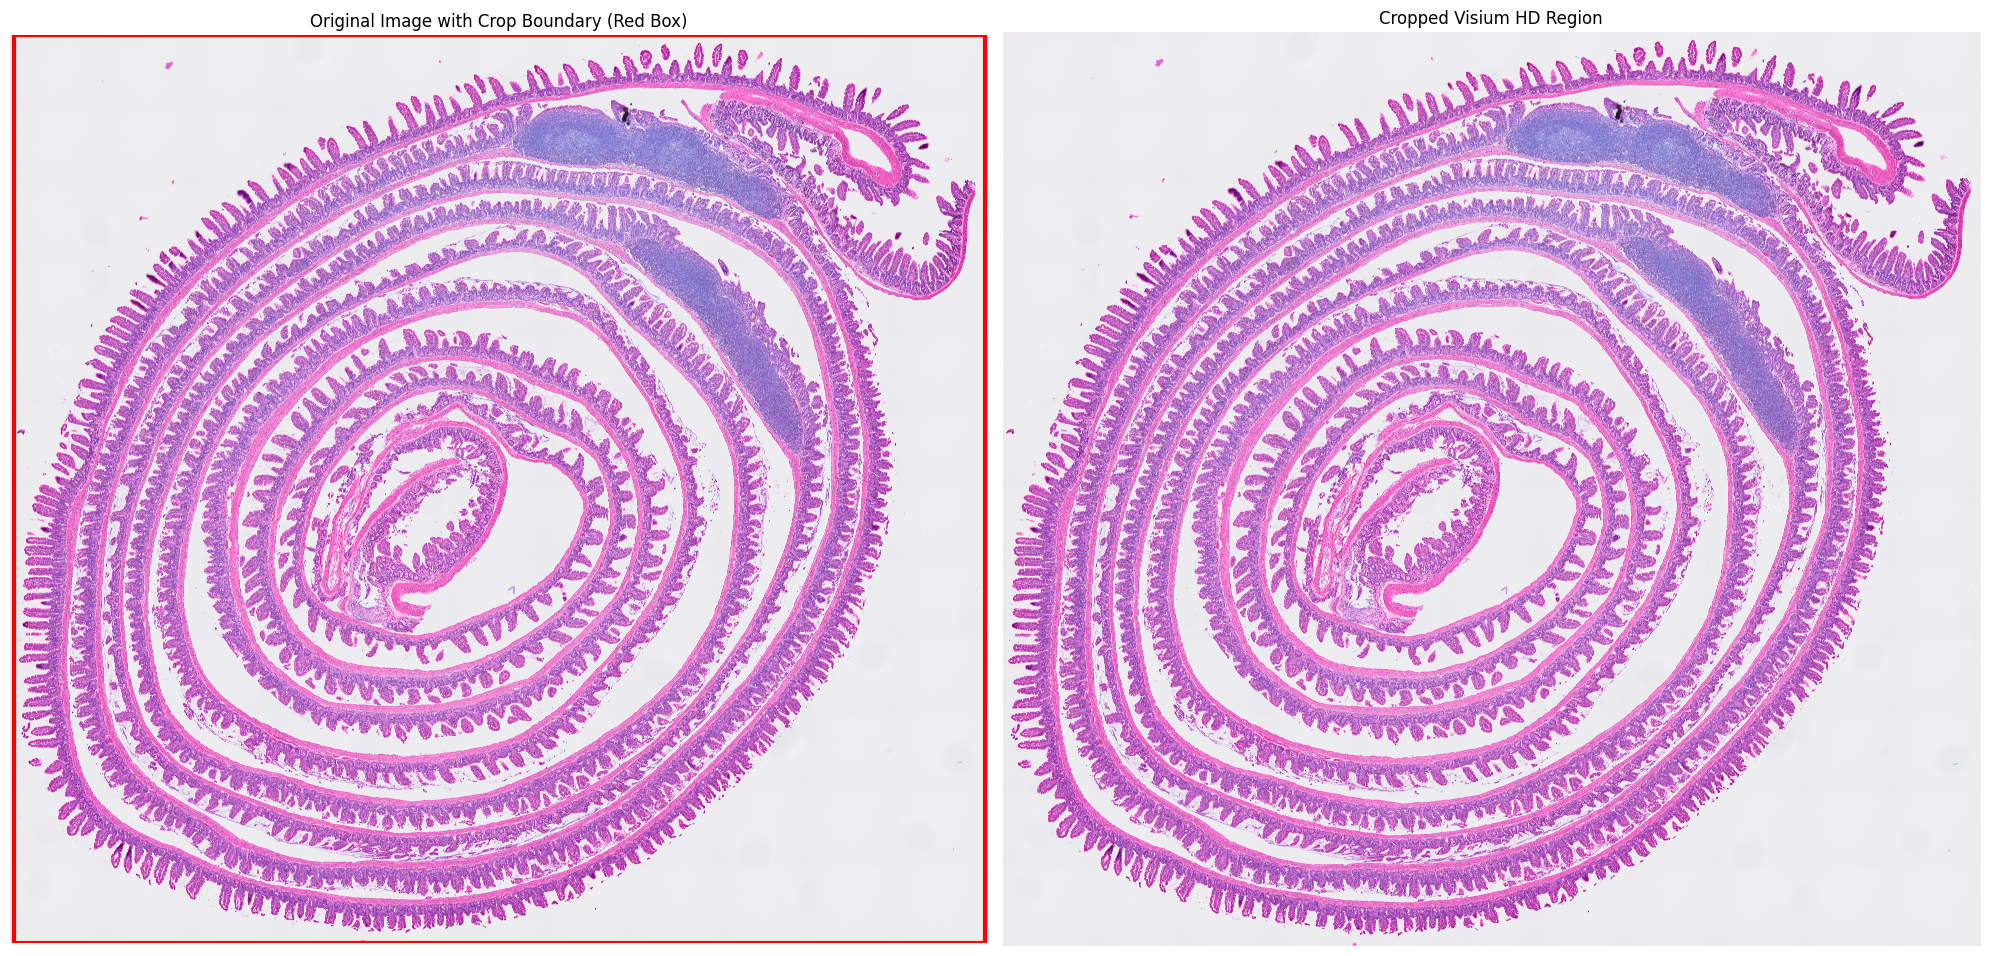

In [6]:
# Visualize using the built-in function
visualize_crop_boundaries(result)

## Display Cropped Image Only

In [ ]:
# Display just the cropped image at full size
plt.figure(figsize=(15, 15))
plt.imshow(result['cropped_image'])
plt.title('Cropped Visium HD Region')
plt.axis('off')
plt.tight_layout()
plt.show()

## Inspect Pixel-to-Spot Mapping

In [ ]:
# The 'pixels' array maps each pixel to a spot ID
# -1 indicates background pixels
print(f"Pixel mapping array shape: {result['pixels'].shape}")
print(f"Unique spot IDs: {len(np.unique(result['pixels'][result['pixels'] != -1]))}")
print(f"Background pixels: {np.sum(result['pixels'] == -1)}")

## Visualize Pixel-to-Spot Mapping

In [ ]:
# Visualize the spot assignment map
plt.figure(figsize=(12, 12))
plt.imshow(result['pixels'], cmap='tab20', interpolation='nearest')
plt.title('Pixel-to-Spot Mapping')
plt.colorbar(label='Spot ID (-1 = background)')
plt.axis('off')
plt.tight_layout()
plt.show()

## Examine Spot Position DataFrame

In [ ]:
# Display the first few rows of the filtered dataframe
result['df_temp'].head(10)